In [5]:
%matplotlib inline
import torch as tc
import tensorflow as tf
import mxnet as mx
from mxnet import np as mxnp
from mxnet import npx as npx
npx.set_np()
# import numpy as np

from d2l import mxnet as mxd2l  # Use MXNet as the backend
from d2l import torch as tcd2l  # Use PyTorch as the backend
from d2l import tensorflow as tfd2l  # Use TensorFlow as the backend

tc.__version__,tf.__version__,mx.__version__

('1.6.0', '2.3.1', '1.7.0')

## --mxnet

In [2]:
from mxnet.gluon import nn

In [3]:
def AlexNetMx():
    net=nn.Sequential()
    net.add(
        nn.Conv2D(channels=96,kernel_size=11,strides=4,activation='relu'),
        nn.MaxPool2D(pool_size=3,strides=2),
        nn.Conv2D(channels=256,kernel_size=5,padding=2,activation='relu'),
        nn.MaxPool2D(pool_size=3,strides=2),
        nn.Conv2D(channels=512,kernel_size=3,padding=1,activation='relu'),
        nn.Conv2D(channels=512,kernel_size=3,padding=1,activation='relu'),
        nn.Conv2D(channels=256,kernel_size=3,padding=1,activation='relu'),
        nn.MaxPool2D(pool_size=3,strides=2),
        nn.Dense(4096,activation='relu'),
        nn.Dense(2048,activation='relu'),
        nn.Dense(1024,activation='relu'),
        nn.Dense(10)
    )
    return net

In [4]:
X = mxnp.random.uniform(size=(1, 1, 224, 224))
net=AlexNetMx()
net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

conv0 output shape:	 (1, 96, 54, 54)
pool0 output shape:	 (1, 96, 26, 26)
conv1 output shape:	 (1, 256, 26, 26)
pool1 output shape:	 (1, 256, 12, 12)
conv2 output shape:	 (1, 512, 12, 12)
conv3 output shape:	 (1, 512, 12, 12)
conv4 output shape:	 (1, 256, 12, 12)
pool2 output shape:	 (1, 256, 5, 5)
dense0 output shape:	 (1, 4096)
dense1 output shape:	 (1, 2048)
dense2 output shape:	 (1, 1024)
dense3 output shape:	 (1, 10)


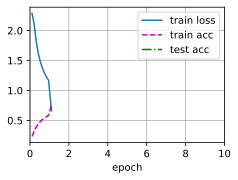

In [ ]:
batch_size = 128
lr, num_epochs = 0.01, 10
train_iter, test_iter = mxd2l.load_data_fashion_mnist(batch_size, resize=224)
mxd2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

## --torch

In [2]:
from torch import nn

In [3]:
def AlexNetTc():
    net=nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=96,kernel_size=11,stride=4),nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,padding=2),nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,padding=1),nn.ReLU(),
        nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,padding=1),nn.ReLU(),
        nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,padding=1),nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nn.Flatten(),
        nn.Linear(6400,4096),nn.ReLU(),
        nn.Linear(4096,4096),nn.ReLU(),
        nn.Linear(4096,10)
        
    )
    return net

In [4]:
net=AlexNetTc()
X = tc.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'Output shape:\t',X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 10])


loss 0.269, train acc 0.901, test acc 0.895
1471.7 examples/sec on cuda:0


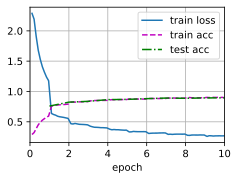

In [5]:
batch_size = 128
train_iter, test_iter = tcd2l.load_data_fashion_mnist(batch_size, resize=224)
lr, num_epochs = 0.01, 10
tcd2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

## --tensorflow

In [2]:
def AlexNetTf():
    net=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4,activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=3,strides=2),
        tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding="same",activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=3,strides=2),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding="same",activation='relu'),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding="same",activation='relu'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same",activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=3,strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096,activation='relu'),
        tf.keras.layers.Dense(4096,activation='relu'),
        tf.keras.layers.Dense(10)        
    ])
    
    return net

In [3]:
net=AlexNetTf()
X = tf.random.uniform((1, 224, 224, 1))
for layer in net.layers:
    X = layer(X)
    print(layer.__class__.__name__, 'Output shape:\t', X.shape)

Conv2D Output shape:	 (1, 54, 54, 96)
MaxPooling2D Output shape:	 (1, 26, 26, 96)
Conv2D Output shape:	 (1, 26, 26, 256)
MaxPooling2D Output shape:	 (1, 12, 12, 256)
Conv2D Output shape:	 (1, 12, 12, 384)
Conv2D Output shape:	 (1, 12, 12, 384)
Conv2D Output shape:	 (1, 12, 12, 256)
MaxPooling2D Output shape:	 (1, 5, 5, 256)
Flatten Output shape:	 (1, 6400)
Dense Output shape:	 (1, 4096)
Dense Output shape:	 (1, 4096)
Dense Output shape:	 (1, 10)


loss 0.334, train acc 0.876, test acc 0.860
1778.7 examples/sec on /GPU:0


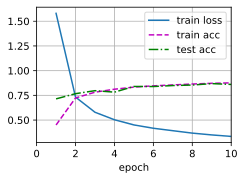

In [5]:
batch_size = 256
train_iter, test_iter = tfd2l.load_data_fashion_mnist(batch_size, resize=224)
lr, num_epochs = 0.01, 10
tfd2l.train_ch6(AlexNetTf, train_iter, test_iter, num_epochs, lr)